# Joblist Dataset

Dataset : [https://www.kaggle.com/datasets/usamakhan8199/current-data-science-jobs-in-india-by-glassdoor]

This Dataset consists list of AI Jobs in india .

This dataset is scraped from glassdoor.

Job titles which are interchangeably used ('Data Scientist', 'Data Engineer' ,'Machine Learning Engineer','Data Analyst').

Number of rows in data - 885

Number of columns/attribute in data - 19

Attribute Information:

* 'Job.Title' : Job title
* 'Job.Description': Job description
* 'Rating': Job rating
* 'Company.Name': Company name
* 'Location': Location of the company
* 'Headquarters': Company headquarters
* 'Size': the Size of the company
* 'Founded': The year it was founded
* 'Type.of.ownership': Public or private ownership
* 'Industry': Type of industry company belongs
* 'Sector': Type of sector company belongs
* 'Revenue': Yearly revenue by company
* 'Competitors': Company competitors
* 'Python': Does description has python keyword in it 1 if yes 0 if no
* 'R.Prog': Does description has R prog keyword in it 1 if yes 0 if no
* 'Excel': Does description has Excel keyword in it 1 if yes 0 if no
* 'Hadoop': Does description has Hadoop keyword in it 1 if yes 0 if no
* 'SQL': Does description has SQL keyword in it 1 if yes 0 if no
* 'SAS: Does description has SAS keyword in it 1 if yes 0 if no


## Objective:
 Finding Companies most probable to hire an ML Engineer/Data Analyst Applicant in respect to his/her skillset.
 
 To analyse Machine Learning Job Market in India with respect to the given problem statement using Segmentation analysis and       outline the segments most optimal to apply or prepare for Machine Learning Jobs.
 
 

In [63]:
#import all the necessary packages.
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import warnings
import seaborn as sns







## Overview of the Data

In [39]:
#load data
data =pd.read_csv('cleaned_job_dataset.csv', encoding = "ISO-8859-1")


In [4]:
#numbers of data points
#number of features 

print('Number of data points and columns')
print(data.shape)
print('************************')

print(data.columns)


Number of data points and columns
(885, 19)
************************
Index(['Job.Title', 'Job.Description', 'Rating', 'Company.Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type.of.ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Python', 'R Prog', 'Excel',
       'Hadoop', 'SQL', 'SAS'],
      dtype='object')


In [5]:
#overview of few rows:
data.head()

,Job.Title,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Python,R Prog,Excel,Hadoop,SQL,SAS
0,Data Scientist,Site Name: India - Karnataka - Bangalore\r\nPo...,3.9,GSK,Bengaluru,"Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500+ billion (INR),"Pfizer, AstraZeneca, Merck",1,0,0,1,0,0
1,Data Scientist,Overview\r\n\r\n\r\nWe have an exciting opport...,4.0,Quanticate,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1 to 5 billion (INR),"GCE Solutions, Parexel, IQVIA",1,0,0,0,0,1
2,Data Scientist,Provide analytical insights into emerging prob...,3.5,PayPal,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,500+ billion (INR),"Square, Amazon, Apple",1,0,0,0,1,1
3,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,500+ billion (INR),"Google, Microsoft, Walmart",1,0,1,0,1,0
4,Data Scientist,"When everything's connected, how we connect is...",3.3,TTEC,Hyderabad,"Englewood, CO",10000+ employees,1982,Company - Public,Staffing & Outsourcing,Business Services,100 to 500 billion (INR),"Teleperformance, TaskUs, Convergys",1,0,1,0,0,1


## Understanding various features

### Basic stats for feature:Job.Title

In [6]:
print(data['Job.Title'].describe())

count                885
unique                 4
top       Data Scientist
freq                 546
Name: Job.Title, dtype: object


#### Observations:

we have total 4 unique job title.

(546/885) = 61 percent of job title is data Scientist.

In [7]:
#type of job title
print(data['Job.Title'].unique())

['Data Scientist' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst']


### Basic stats for feature:Company.Name

In [8]:
print(data['Company.Name'].describe())

count        885
unique       455
top       ZoomRx
freq          22
Name: Company.Name, dtype: object


In [9]:
# find the 10 most frequent Company.Name.
Company_Name_count = Counter(list(data['Company.Name']))
Company_Name_count.most_common(10)

[('ZoomRx', 22),
 ('Amazon', 12),
 ('EY', 12),
 ('Sanofi', 12),
 ('Walmart', 12),
 ('Quantzig', 12),
 ('Citi', 12),
 ('String Bio', 12),
 ('Matelabs Innovations Pvt. Ltd.', 12),
 ('LogisticsNow', 11)]

#### Observations:
1. we have 445 Unique company.
2. top Frequent company is ZoomRx.
3. we can see the top 10 company which are hiring Like Amazon,EY,Walmart etc

### Basic stats for feature: Rating 

In [10]:
print(data['Rating'].describe())

count    885.000000
mean       3.063729
std        1.865526
min       -1.000000
25%        3.200000
50%        3.800000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64


In [11]:
data.groupby(by=['Company.Name'])['Rating'].mean().sort_values(ascending=False).head(5)


Company.Name
Machstatz             5.0
eInvenSys             5.0
TCPWave               5.0
Seldon                5.0
Q-Dat IT Solutions    5.0
Name: Rating, dtype: float64

#### Observations:
1. Company like machstaz , eInvenSys ,TCPWave etc have higher ratings.
2. Companies which have high ratings means employees are Satisfied and Happier.

### Basic stats for feature: Location

In [12]:
print(data['Location'].describe())

print('************************************')
#unique Locations:

print('Unique locations are')
print(data['Location'].unique())

count           885
unique           32
top       Bengaluru
freq            393
Name: Location, dtype: object
************************************
Unique locations are
['Bengaluru' 'Hyderabad' 'Chennai' 'Mumbai' '-1' 'Pune' 'Kozhikode'
 'Gurgaon' 'Chandigarh' 'India' 'New Delhi' 'Noida' 'Jamshedpur'
 'Ahmedabad' 'Gandhinagar' 'Thiruvananthapuram' 'Indore' 'Guntur' 'Surat'
 'Bhubaneswar' 'Madurai' 'Barabanki' 'Ludhiana' 'Kolkata' 'Bagalur'
 'Kochi' 'Pitampura' 'Nagpur' 'Jaipur' 'Vadodara' 'Mangalore' 'Mysore']


In [13]:
# find the 9 most frequent locations which is hiring .
Location_count = Counter(list(data['Location']))
Location_count.most_common(9)

[('Bengaluru', 393),
 ('Mumbai', 134),
 ('Hyderabad', 76),
 ('Pune', 67),
 ('Chennai', 61),
 ('Gurgaon', 35),
 ('New Delhi', 21),
 ('India', 18),
 ('Kochi', 13)]

#### Observations:
1. we have 32 unique locations.
2. top frequent Location hiring is Bengaluru (393 out of 885 i.e is 44 percent).
3. Most freqent locations are Beangaluru, Mumbai, Hyderabad, Pune etc


### Basic stats for feature: Size

In [14]:
print(data['Size'].describe())

count                   885
unique                    8
top       1 to 50 employees
freq                    226
Name: Size, dtype: object


In [15]:
#type of Size
print(data['Size'].unique())

['10000+ employees' '201 to 500 employees' '5001 to 10000 employees'
 '1001 to 5000 employees' '-1' '1 to 50 employees' '51 to 200 employees'
 '501 to 1000 employees']


#### Observations:
1. we have 8 unique size based on number of employees.
2. Top frequent size is 1-50 employees.
3. we can conclude that startup companies are more.

### Basic stats for feature:  Industry

In [16]:
print(data['Industry'].describe())

print('************************************************')

print('Number of Unique Industry')
print(data['Industry'].unique())

print('************************************************')

# find the 10 most frequent Industry which is hiring .
print('The top 10 Most Frequent Industry Which is Hiring')
Industry_count = Counter(list(data['Industry']))
Industry_count.most_common(10)

count     885
unique     53
top        -1
freq      249
Name: Industry, dtype: object
************************************************
Number of Unique Industry
['Biotech & Pharmaceuticals' 'Internet' 'Staffing & Outsourcing'
 'Enterprise Software & Network Solutions' 'Chemical Manufacturing' '-1'
 'Architectural & Engineering Services' 'IT Services'
 'Sporting Goods Shops' 'Cable, Internet & Telephone Providers'
 'Consulting' 'Computer Hardware & Software'
 'Financial Analytics & Research' 'Brokerage Services'
 'Oil & Gas Exploration & Production' 'Film Production & Distribution'
 'Lending' 'Financial Transaction Processing' 'Advertising & Marketing'
 'Aerospace & Defence' 'Ticket Sales' 'TV Broadcasting & Cable Networks'
 'Accounting' 'Research & Development' 'Healthcare Services & Hospitals'
 'Investment Banking & Asset Management' 'Consumer Products Manufacturing'
 'Oil & Gas Services' 'Real Estate' 'Department, Clothing, & Shoe Shops'
 'Transportation Equipment Manufacturing' 'Tra

[('-1', 249),
 ('IT Services', 103),
 ('Staffing & Outsourcing', 65),
 ('Consulting', 61),
 ('Computer Hardware & Software', 59),
 ('Enterprise Software & Network Solutions', 56),
 ('Biotech & Pharmaceuticals', 46),
 ('Internet', 40),
 ('Investment Banking & Asset Management', 26),
 ('Advertising & Marketing', 16)]

#### Observations:
1. -1 doesn't make any sense.
2. we have 52 Unique industry which are hiring.
3. Top Most Frequent Industries hiring are IT services , Staffing & Outsourcing ,Consulting etc.

### Basic stats for feature: Revenue

In [17]:
print(data['Revenue'].describe())

print('************************************************')

print('Number of Unique Revenue')
print(data['Revenue'].unique())

print('************************************************')

# find the 10 most frequent revenue.
print('The top 10 Most Frequent Revenue')
Revenue_count = Counter(list(data['Revenue']))
Revenue_count.most_common(10)

count     885
unique     11
top        -1
freq      498
Name: Revenue, dtype: object
************************************************
Number of Unique Revenue
['500+ billion (INR)' '1 to 5 billion (INR)' '100 to 500 billion (INR)'
 '50 to 100 billion (INR)' '500 million to 1 billion (INR)' '-1'
 '10 to 50 billion (INR)' '100 to 500 million (INR)'
 '10 to 50 million (INR)' '5 to 10 billion (INR)'
 '50 to 100 million (INR)']
************************************************
The top 10 Most Frequent Revenue


[('-1', 498),
 ('500+ billion (INR)', 168),
 ('1 to 5 billion (INR)', 52),
 ('100 to 500 billion (INR)', 41),
 ('10 to 50 billion (INR)', 32),
 ('500 million to 1 billion (INR)', 31),
 ('50 to 100 billion (INR)', 23),
 ('100 to 500 million (INR)', 22),
 ('10 to 50 million (INR)', 13),
 ('5 to 10 billion (INR)', 3)]

### Basic stats for feature: Sector

In [18]:
print(data['Sector'].describe())

print('************************************************')

print('Number of Unique Sector')
print(data['Sector'].unique())

print('************************************************')

# find the 10 most frequent revenue.
print('The top 10 Most Frequent Sector')
Revenue_count = Counter(list(data['Sector']))
Revenue_count.most_common(10)

count                        885
unique                        21
top       Information Technology
freq                         258
Name: Sector, dtype: object
************************************************
Number of Unique Sector
['Biotech & Pharmaceuticals' 'Information Technology' 'Business Services'
 'Manufacturing' '-1' 'Retail' 'Telecommunications' 'Finance'
 'Oil, Gas, Energy & Utilities' 'Media' 'Aerospace & Defence'
 'Arts, Entertainment & Recreation' 'Accounting & Legal' 'Healthcare'
 'Real Estate' 'Transportation & Logistics' 'Education' 'Mining & Metals'
 'Insurance' 'Agriculture & Forestry' 'Travel & Tourism']
************************************************
The top 10 Most Frequent Sector


[('Information Technology', 258),
 ('-1', 248),
 ('Business Services', 149),
 ('Finance', 62),
 ('Biotech & Pharmaceuticals', 46),
 ('Manufacturing', 18),
 ('Retail', 16),
 ('Transportation & Logistics', 14),
 ('Accounting & Legal', 13),
 ('Media', 12)]

#### Observations:
1. We have 20 unique sector excluding -1 because it doesnt make any sense.
2. Top most frequent sector which contributing in hiring is Information Technology.
3. Most frequent recruiters are in sector IT , Busines services, Finance etc.

## Data Cleaning:

In [19]:
# Remove row which contains Rating -1 
indexes= data[ (data['Sector'] == '-1') ].index
data.drop(indexes,inplace=True)
print(data['Sector'].unique())

['Biotech & Pharmaceuticals' 'Information Technology' 'Business Services'
 'Manufacturing' 'Retail' 'Telecommunications' 'Finance'
 'Oil, Gas, Energy & Utilities' 'Media' 'Aerospace & Defence'
 'Arts, Entertainment & Recreation' 'Accounting & Legal' 'Healthcare'
 'Real Estate' 'Transportation & Logistics' 'Education' 'Mining & Metals'
 'Insurance' 'Agriculture & Forestry' 'Travel & Tourism']


In [20]:
# Remove row which contains locations -1 
indexes= data[ (data['Location'] == '-1') ].index
data.drop(indexes,inplace=True)
print(data['Location'].unique())

['Bengaluru' 'Hyderabad' 'Chennai' 'Mumbai' 'Pune' 'Kozhikode'
 'Chandigarh' 'India' 'New Delhi' 'Gurgaon' 'Noida' 'Thiruvananthapuram'
 'Indore' 'Ahmedabad' 'Guntur' 'Surat' 'Bhubaneswar' 'Madurai' 'Ludhiana'
 'Kolkata' 'Kochi' 'Jaipur' 'Vadodara' 'Mangalore']


In [21]:
#print no of data points 

data.shape

(634, 19)

## Data Visualization:


### The most common search Titles

Data Scientist               275
Data Analyst                  73
Data Engineer                 56
Machine Learning Engineer     10
Name: Job.Title, dtype: int64


<BarContainer object of 4 artists>

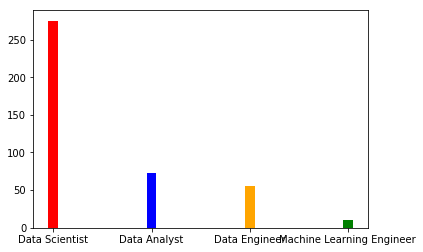

In [26]:
#group Job Titles
vin=data.loc[data.Python==1]['Job.Title'].value_counts()
print(vin)


#plot for Job Title
plt.bar(list(vin.keys()),list(vin.values),color=['r','b','Orange','g'],width=0.1 )
#as width reduces from 1 to 0,bars become thin.

#### Conlusion
1. Data Scientist,Data Analyst,Data Enginner , Machine Learning Engineer job titles are interchangeably  used for search AI jobs.
2. Data Scientist , Data Analyst are most frequent job titles used.

### The most demanded skills

In [22]:
#Group JOB TITLE based on Skills:
gb = data.groupby(['Job.Title'])[['Python','R Prog','Excel','Hadoop','SQL','SAS']].sum()
print(gb)



                           Python  R Prog  Excel  Hadoop  SQL  SAS
Job.Title                                                         
Data Analyst                   73       3    133       9  111   26
Data Engineer                  56       1     53      43   65    2
Data Scientist                275      15    136     108  197   57
Machine Learning Engineer      10       1      6       2    3    0


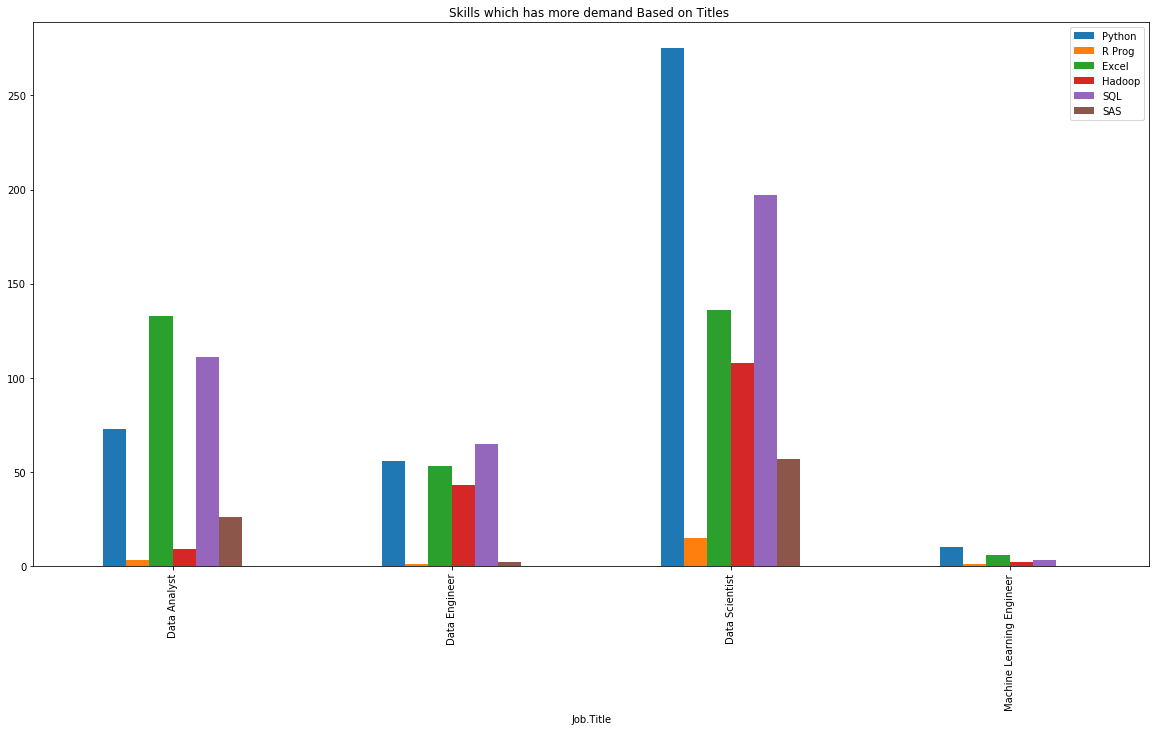

In [57]:
#bar plot for above analysis:
gb.plot(kind='bar',figsize=(20,10) ,title= 'Skills which has more demand Based on Titles ')

#### Conclusions
1. Python is top most demanded skill is requred for data scientist job.
2. For data Analyst Excel, python is most demanded skills required .
3. For Machine Learning Engineer Most demanded skill is Python
4. For Data Engineer Most demanded skills are Sql , python, excel.

## Job Vacancies based on location corresponding to job titles 

In [53]:
#group job title based on location, analyzing which job title has more demand in corresponding locations
gb2 = data.groupby(by=['Location','Job.Title'])['Job.Title'].count()
print(gb2)


Location            Job.Title                
-1                  Data Scientist                12
Ahmedabad           Data Analyst                   2
                    Data Scientist                 6
                    Machine Learning Engineer      1
Bagalur             Machine Learning Engineer      1
Barabanki           Data Scientist                 1
Bengaluru           Data Analyst                  87
                    Data Engineer                 41
                    Data Scientist               246
                    Machine Learning Engineer     19
Bhubaneswar         Data Scientist                 2
Chandigarh          Data Scientist                 5
Chennai             Data Analyst                  13
                    Data Engineer                 12
                    Data Scientist                35
                    Machine Learning Engineer      1
Gandhinagar         Data Scientist                 1
Guntur              Data Scientist                 1


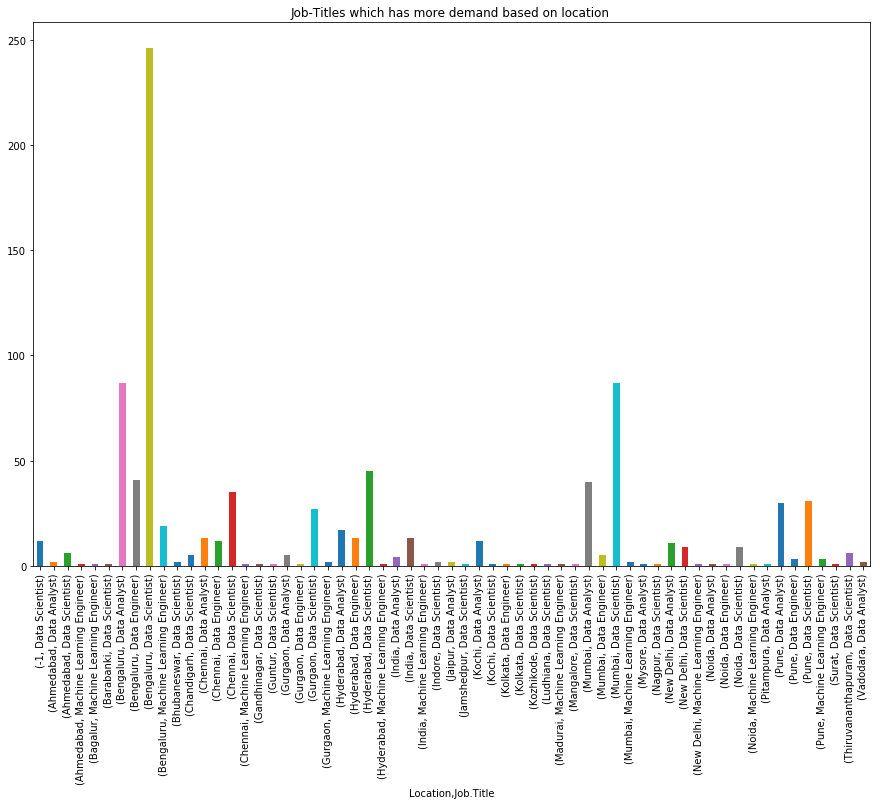

In [55]:
#bar plot for Job-Titles based on location
gb2.plot(kind = 'bar',figsize=(15,10),title='Job-Titles which has more demand based on location ')

#### Conclusions
1. Job Vacancy for data Scientist in Banglore is in top,then in mumbai and so on..
2. Job Vacancy for Data Analyst in Bengaluru is in 2nd top most.



## Job Vacancies Based on Location

Job vacancies based on location
Location
Ahmedabad               4
Bengaluru             299
Bhubaneswar             1
Chandigarh              2
Chennai                53
Guntur                  1
Gurgaon                24
Hyderabad              52
India                   7
Indore                  1
Jaipur                  2
Kochi                  13
Kolkata                 2
Kozhikode               1
Ludhiana                1
Madurai                 1
Mangalore               1
Mumbai                 94
New Delhi               4
Noida                   8
Pune                   57
Surat                   1
Thiruvananthapuram      4
Vadodara                1
Name: Job.Title, dtype: int64
***************************************


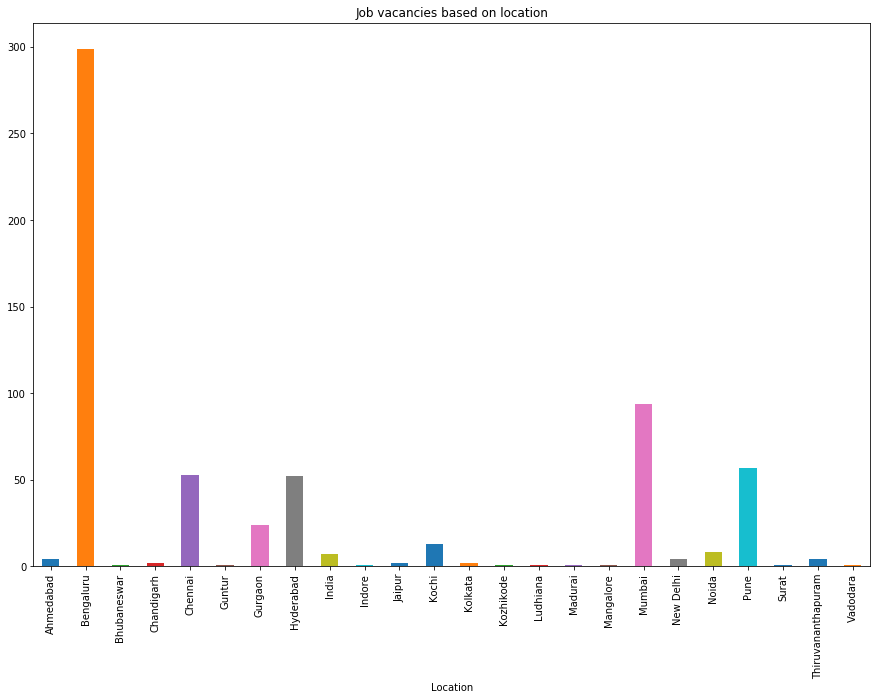

In [31]:
#job Vacancies based on location:
gb3 = data.groupby(['Location'])['Job.Title'].count()
print("Job vacancies based on location")
print(gb3)

print('***************************************')

#bar plot
gb3.plot(kind = 'bar',figsize=(15,10),title='Job vacancies based on location')


#### Conclusions:
1. Bengaluru is top most location for Job vacanies.
2. 2nd top most location in job vacancy is Mumbai,3rd is pune and so on..

## Size of employees based on type of ownership

Type of ownership
['Company - Public' 'Company - Private' '-1' 'Non-profit Organisation']
********************************************************************
Type.of.ownership        Size                   
-1                       -1                          72
                         1 to 50 employees            8
                         10000+ employees             5
                         1001 to 5000 employees       3
                         201 to 500 employees        11
                         5001 to 10000 employees      1
                         51 to 200 employees          1
Company - Private        -1                          62
                         1 to 50 employees          202
                         10000+ employees            23
                         1001 to 5000 employees      36
                         201 to 500 employees        67
                         5001 to 10000 employees     21
                         501 to 1000 employees       40
        

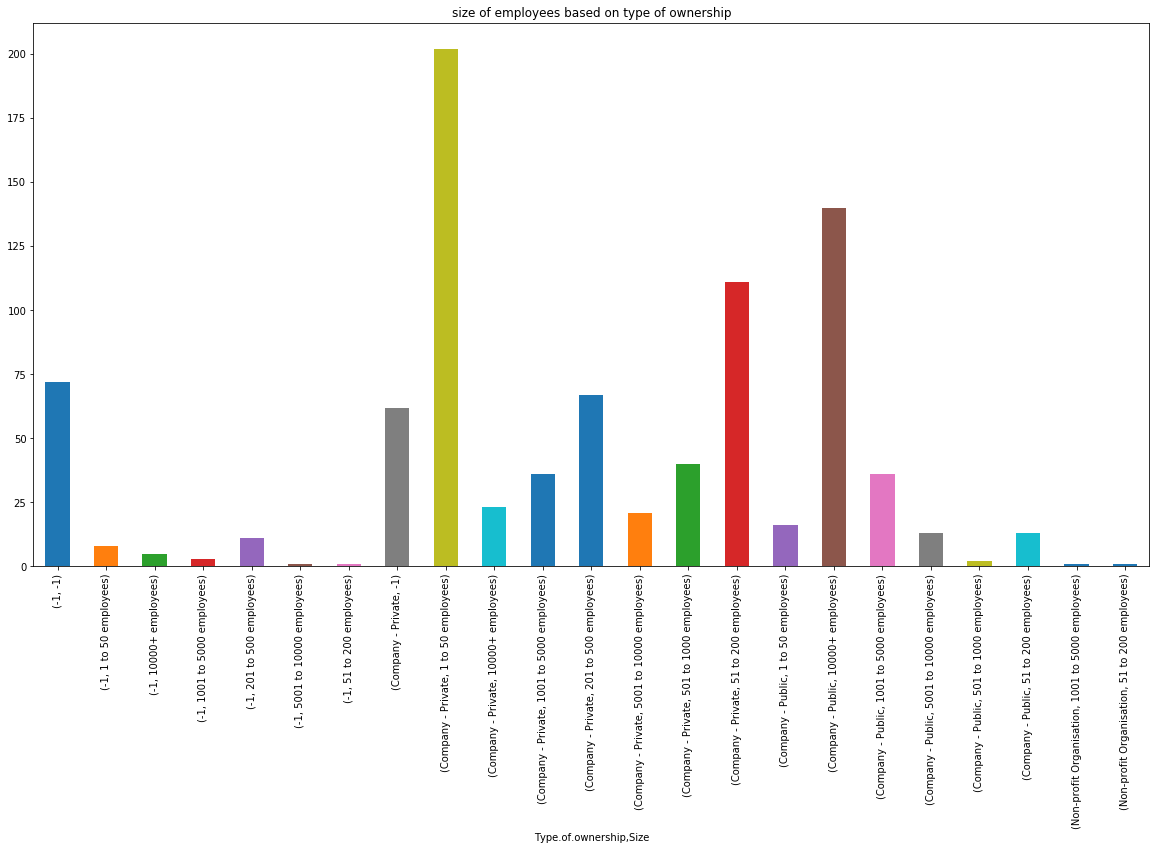

In [40]:
print('Type of ownership')
print(data['Type.of.ownership'].unique())
print('********************************************************************')
#group by size of employees based on type of ownership
gb1 = data.groupby(['Type.of.ownership','Size'])['Size'].count()
print(gb1)

gb1.plot(kind='bar',figsize=(20,10),title='size of employees based on type of ownership')

#### Conclusions:
1. -1 doesn't make any sense in analysis.
2. Type of ownerships are private ,public and non profit organization.
3. In private, size(1-50 employees) is high which means there are more startups companies.
4. In Public, size(10,000 employees) is high.


## Companies Which are Hiring:

In [47]:

print(data['Company.Name'].describe())
print('Total Unique companies are :445')

print('**************************************')

print('Unique Companies are')
print(data['Company.Name'].unique())

# find the 10 most frequent Company.Name.
Company_Name_count = Counter(list(data['Company.Name']))
CN = Company_Name_count.most_common(10)


count        885
unique       455
top       ZoomRx
freq          22
Name: Company.Name, dtype: object
Total Unique companies are :445
**************************************
Unique Companies are
['GSK' 'Quanticate' 'PayPal' 'Amazon' 'TTEC' 'Blue Yonder' 'Buckman'
 'Corp Talents' 'Emotix Miko' 'SpringML' 'Black & Veatch' 'IBM' 'Fanatics'
 'Skoruz' 'Tata Insights and Quants' 'TEQNirvana' 'Mastek Limited'
 'Tata Communications' 'Right Steps Consultancy' 'MTW LABS'
 'Tech27 Systems Ltd.' 'TransUnion' 'Analytics Vidhya' 'Angel Broking'
 'Shell' 'Firminiq' 'Star India' 'ZettaMine' 'Applied Data Finance'
 'Nitor Infotech' 'Autodesk' 'Sulekha' 'Zauba Corp' 'Agnik'
 'iNVERTEDi IT Consultancy Pvt Ltd' 'Dunzo' 'Hewlett Packard Enterprise'
 'Simpl' 'Brillio' 'AppZen' 'Novartis' 'Profisor Services'
 'Kline & Company' 'Eyeota' 'IQLECT' 'Stark Inc.' 'Emerging India Group'
 'Bookmyshow' 'inteliment'
 'Mercedes-Benz Research and Development India Private Limited'
 'Germane Analytics Pvt Ltd' 'Alphonso' 

## Top Most 10 Companies which are Hiring

In [62]:
#print top 10 companies most frequent to hire based on job posting
print('Top Most 10 Companies which are Hiring')
CN


Top Most 10 Companies which are Hiring


[('ZoomRx', 22),
 ('Amazon', 12),
 ('EY', 12),
 ('Sanofi', 12),
 ('Walmart', 12),
 ('Quantzig', 12),
 ('Citi', 12),
 ('String Bio', 12),
 ('Matelabs Innovations Pvt. Ltd.', 12),
 ('LogisticsNow', 11)]

#### Final Conclusions:
[Q] Find Companies most probable to hire an ML Engineer/Data Analyst Applicant in respect to his/her skillset.

[Ans] Top Most Companies which are hiring are 'ZoomRx','Amazon','EY','Walmart','Citi','Sanfoi','Matelabs Innovations Pvt. Ltd. etc.

[Q] To analyse Machine Learning/Data Analyst Job Market in India and outline the segments most optimal to apply or prepare for Data Analyst/ Machine Learning Jobs.

[Ans] Top Most Locations Which Are Hiring Machine Learning/Data Analyst in India Are Beangaluru,Mumbai,Pune,Chennai,Hyderbad.
      Top Most Demanded Skills for prepare Data Analyst/ Machine Learning Jobs are Python,Excel,SQL.